![image info](https://ineuron.ai/images/ineuron-logo.png)

![image info](https://c0.wallpaperflare.com/preview/841/120/33/alcohol-bar-beer-beverage.jpg)

#  <span style="color:blue">Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

# <span style="color:blue">Data Collection.
- The Dataset is collected from https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv
- The data consists of 12 column and 1599 rows.

### <span style="color:green">Import Data and Required Packages¶

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

### <span style="color:green">Import the CSV Data as Pandas DataFrame

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

### <span style="color:green">Show Top 5 Records

In [4]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### <span style="color:green">Shape of the dataset

In [5]:
data.shape

(1599, 12)

**Summary of the dataset**
- The described method will help to see how data has been spread for numerical values.
-  We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [6]:
data.describe(include='all').T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

### <span style="color:green">Check Datatypes in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### <span style="color:green">Check for Duplicates and drop them

In [8]:
data.duplicated().sum()
df=data.drop_duplicates()

### <span style="color:green">Shape of data

In [9]:
df.shape

(1359, 12)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### <span style="color:green">Checking the correlation

In [11]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

# <span style="color:blue">EDA and FE

### <span style="color:green">Check the ditribution for the features

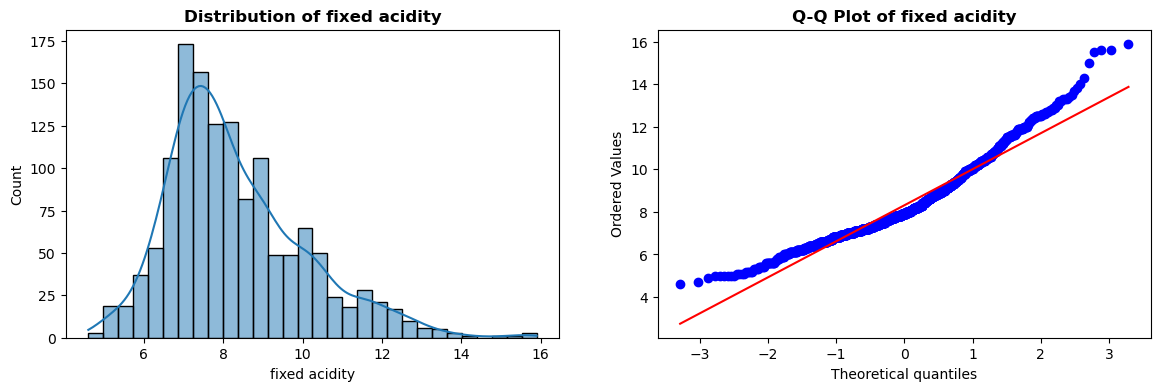

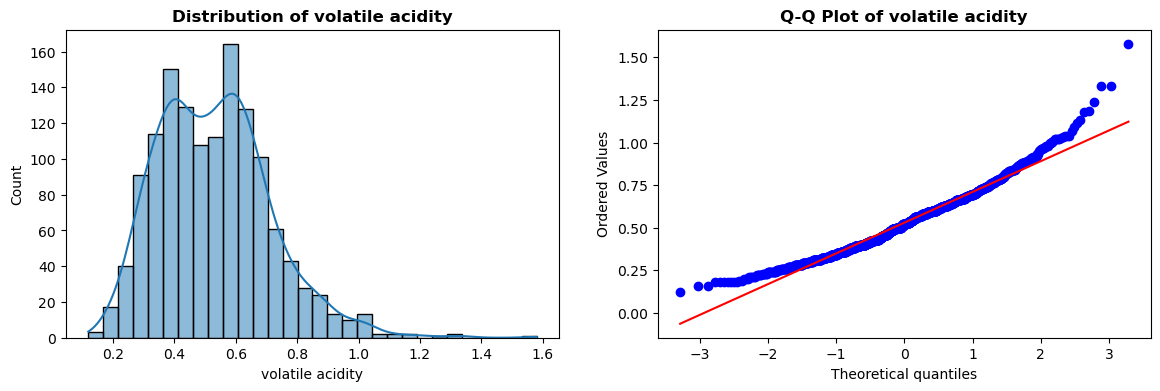

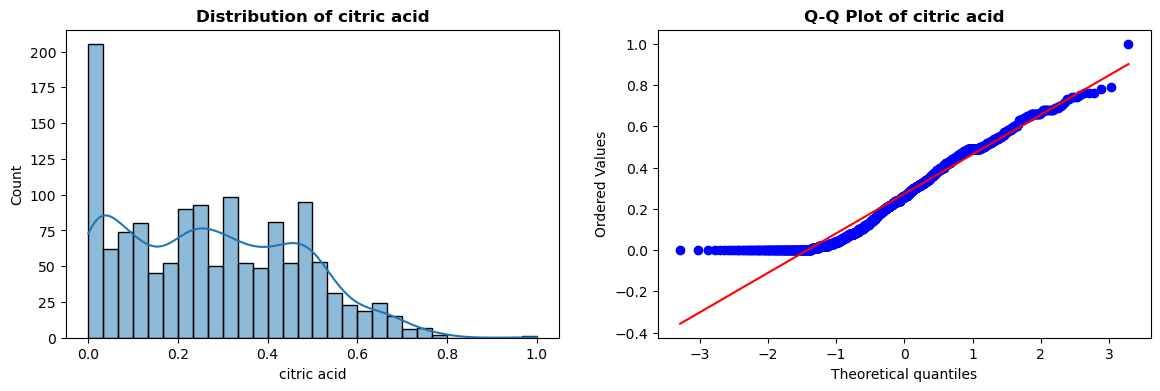

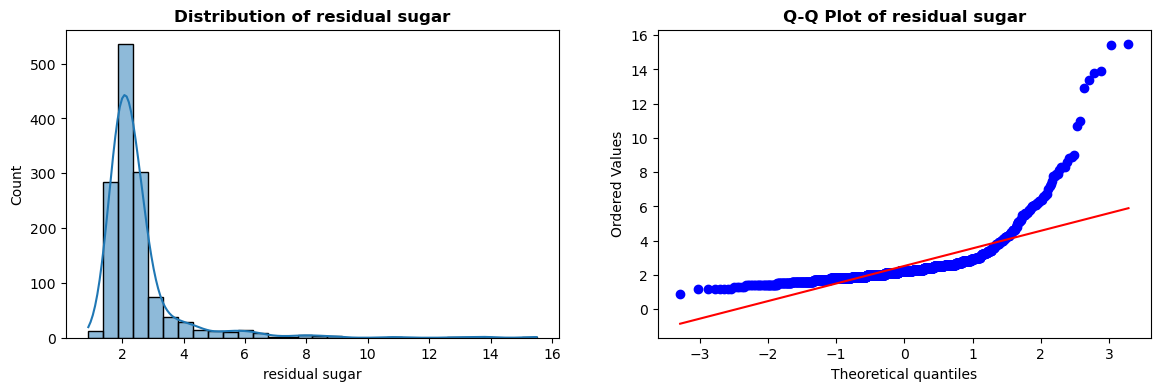

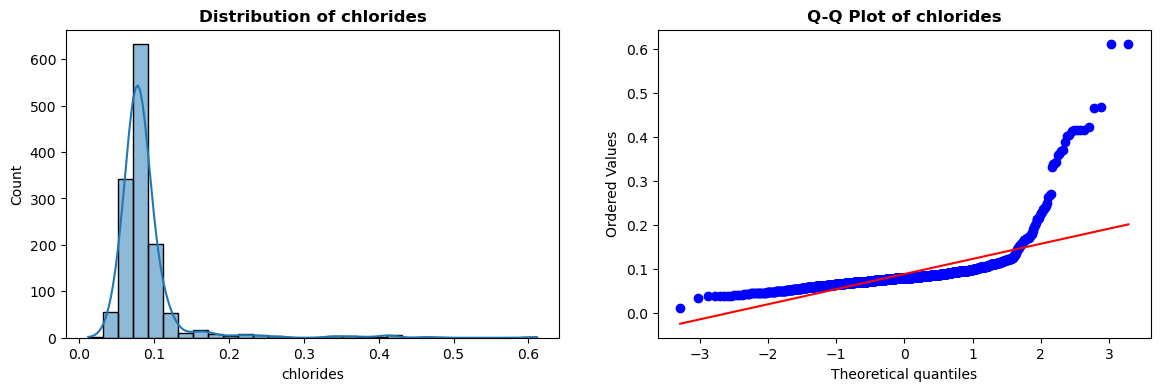

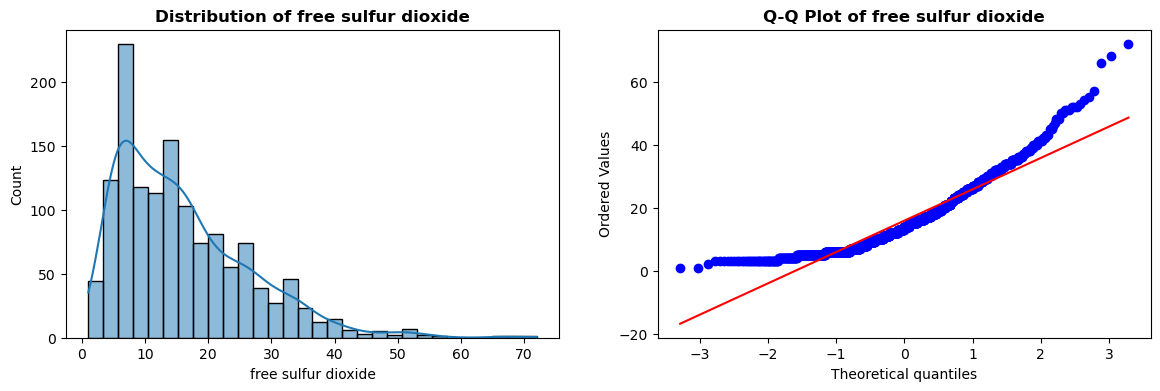

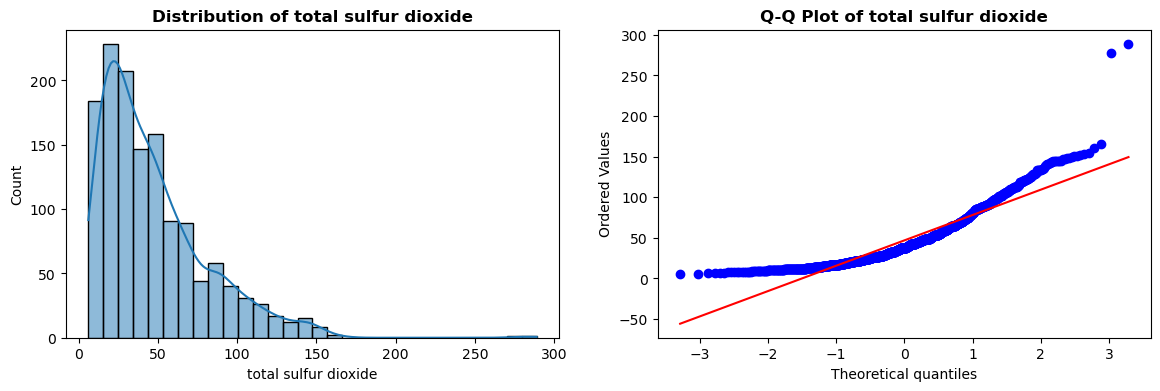

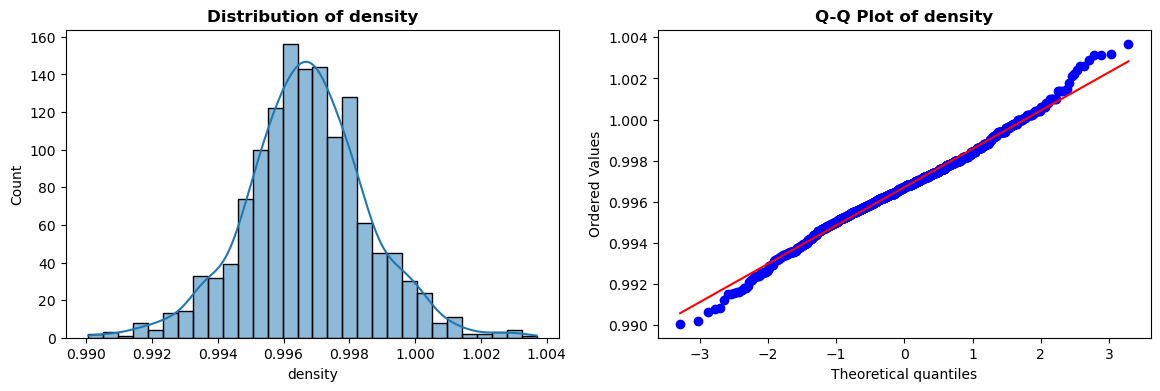

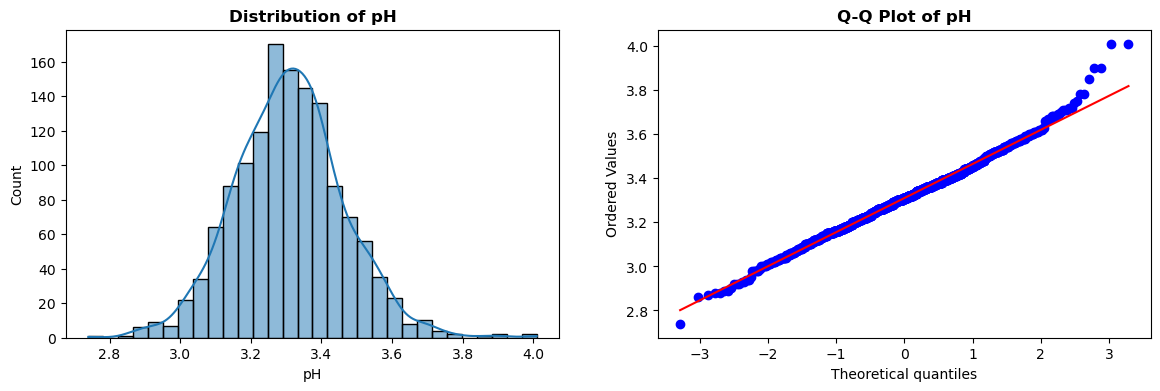

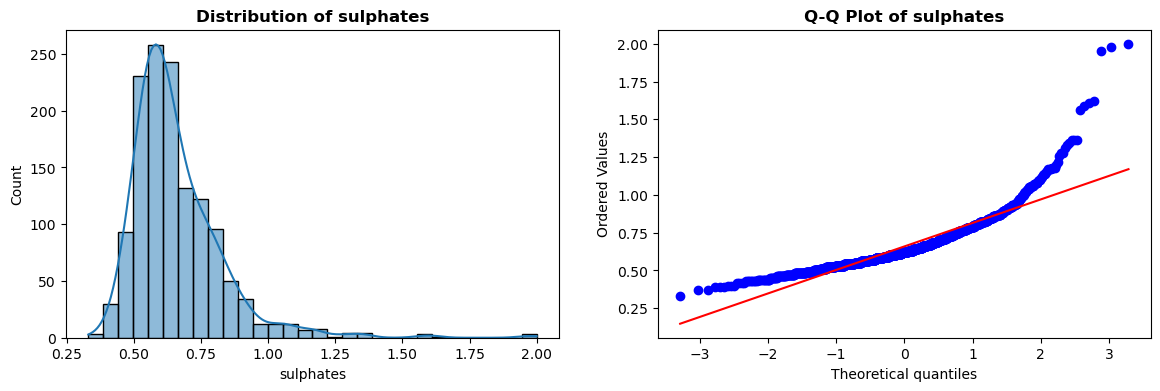

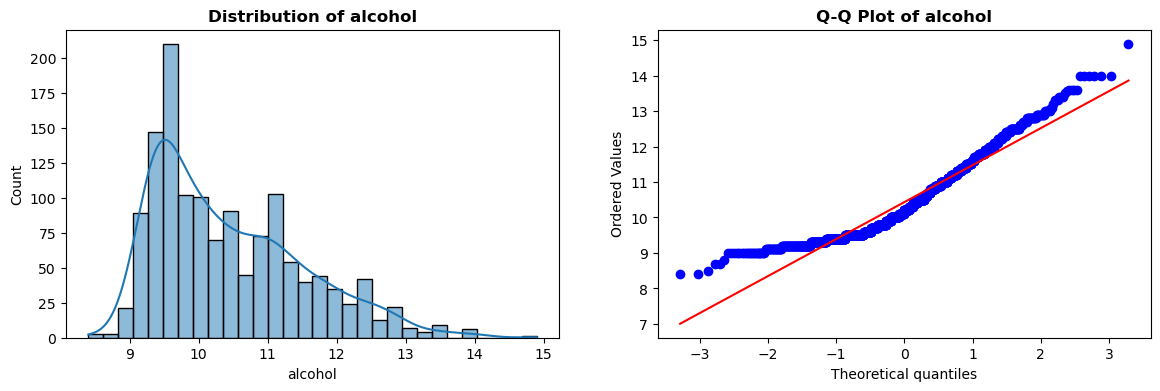

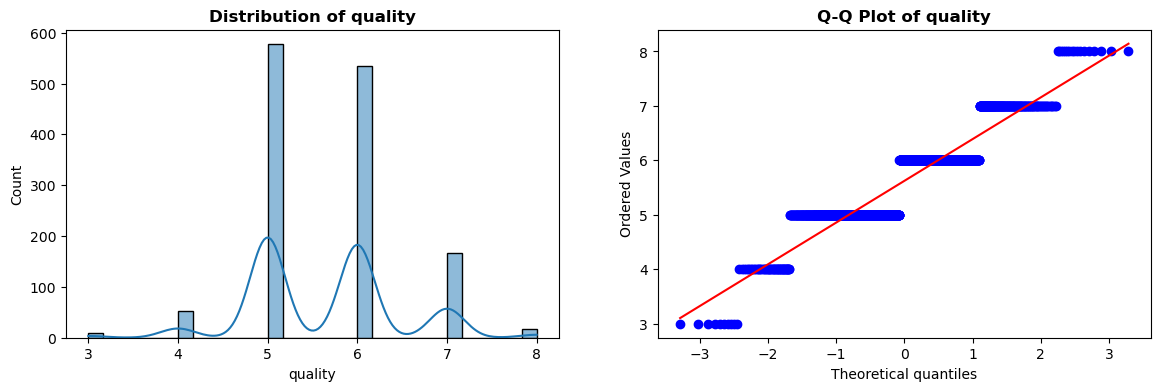

In [12]:
for i in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30)
    plt.title("Distribution of {}".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(df[i], dist='norm', plot=plt)
    plt.title("Q-Q Plot of {}".format(i),fontweight="bold")
    plt.show();

### <span style="color:green">Showing Outliers in univariate

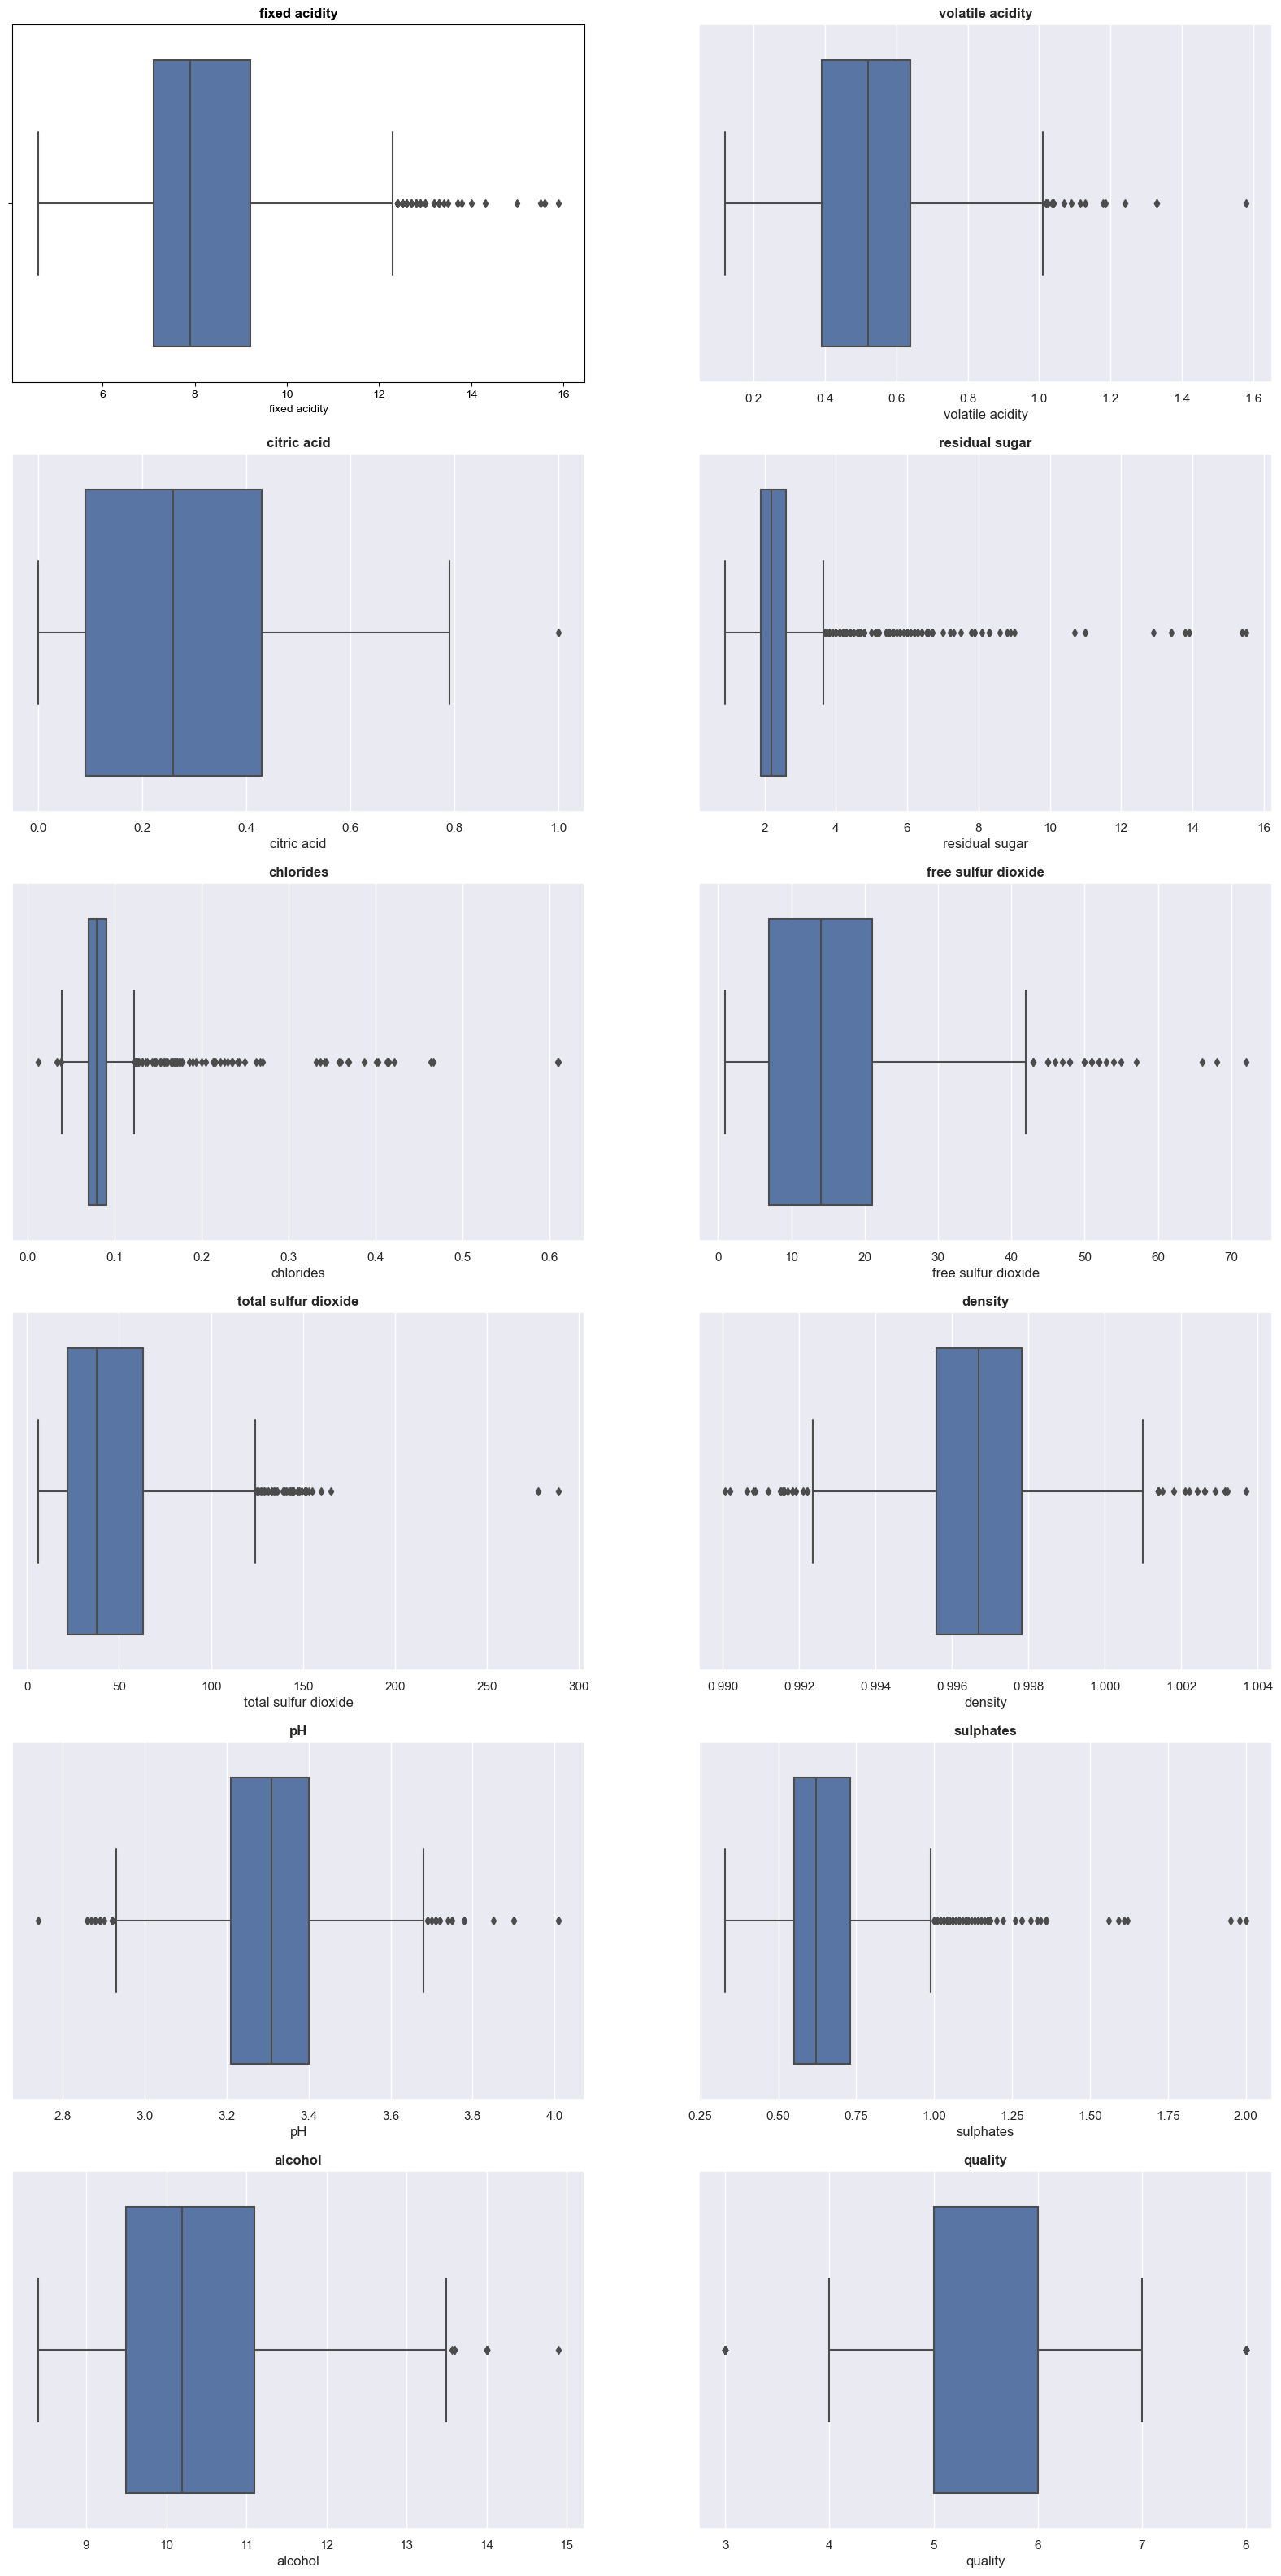

In [13]:
plt.figure(figsize=(20,40))
for i in enumerate(df):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, x=i[1], color='b')
    plt.title("{}".format(i[1]), fontweight="bold")

### <span style="color:green">Visualising data outlier in each feature with respect to quality

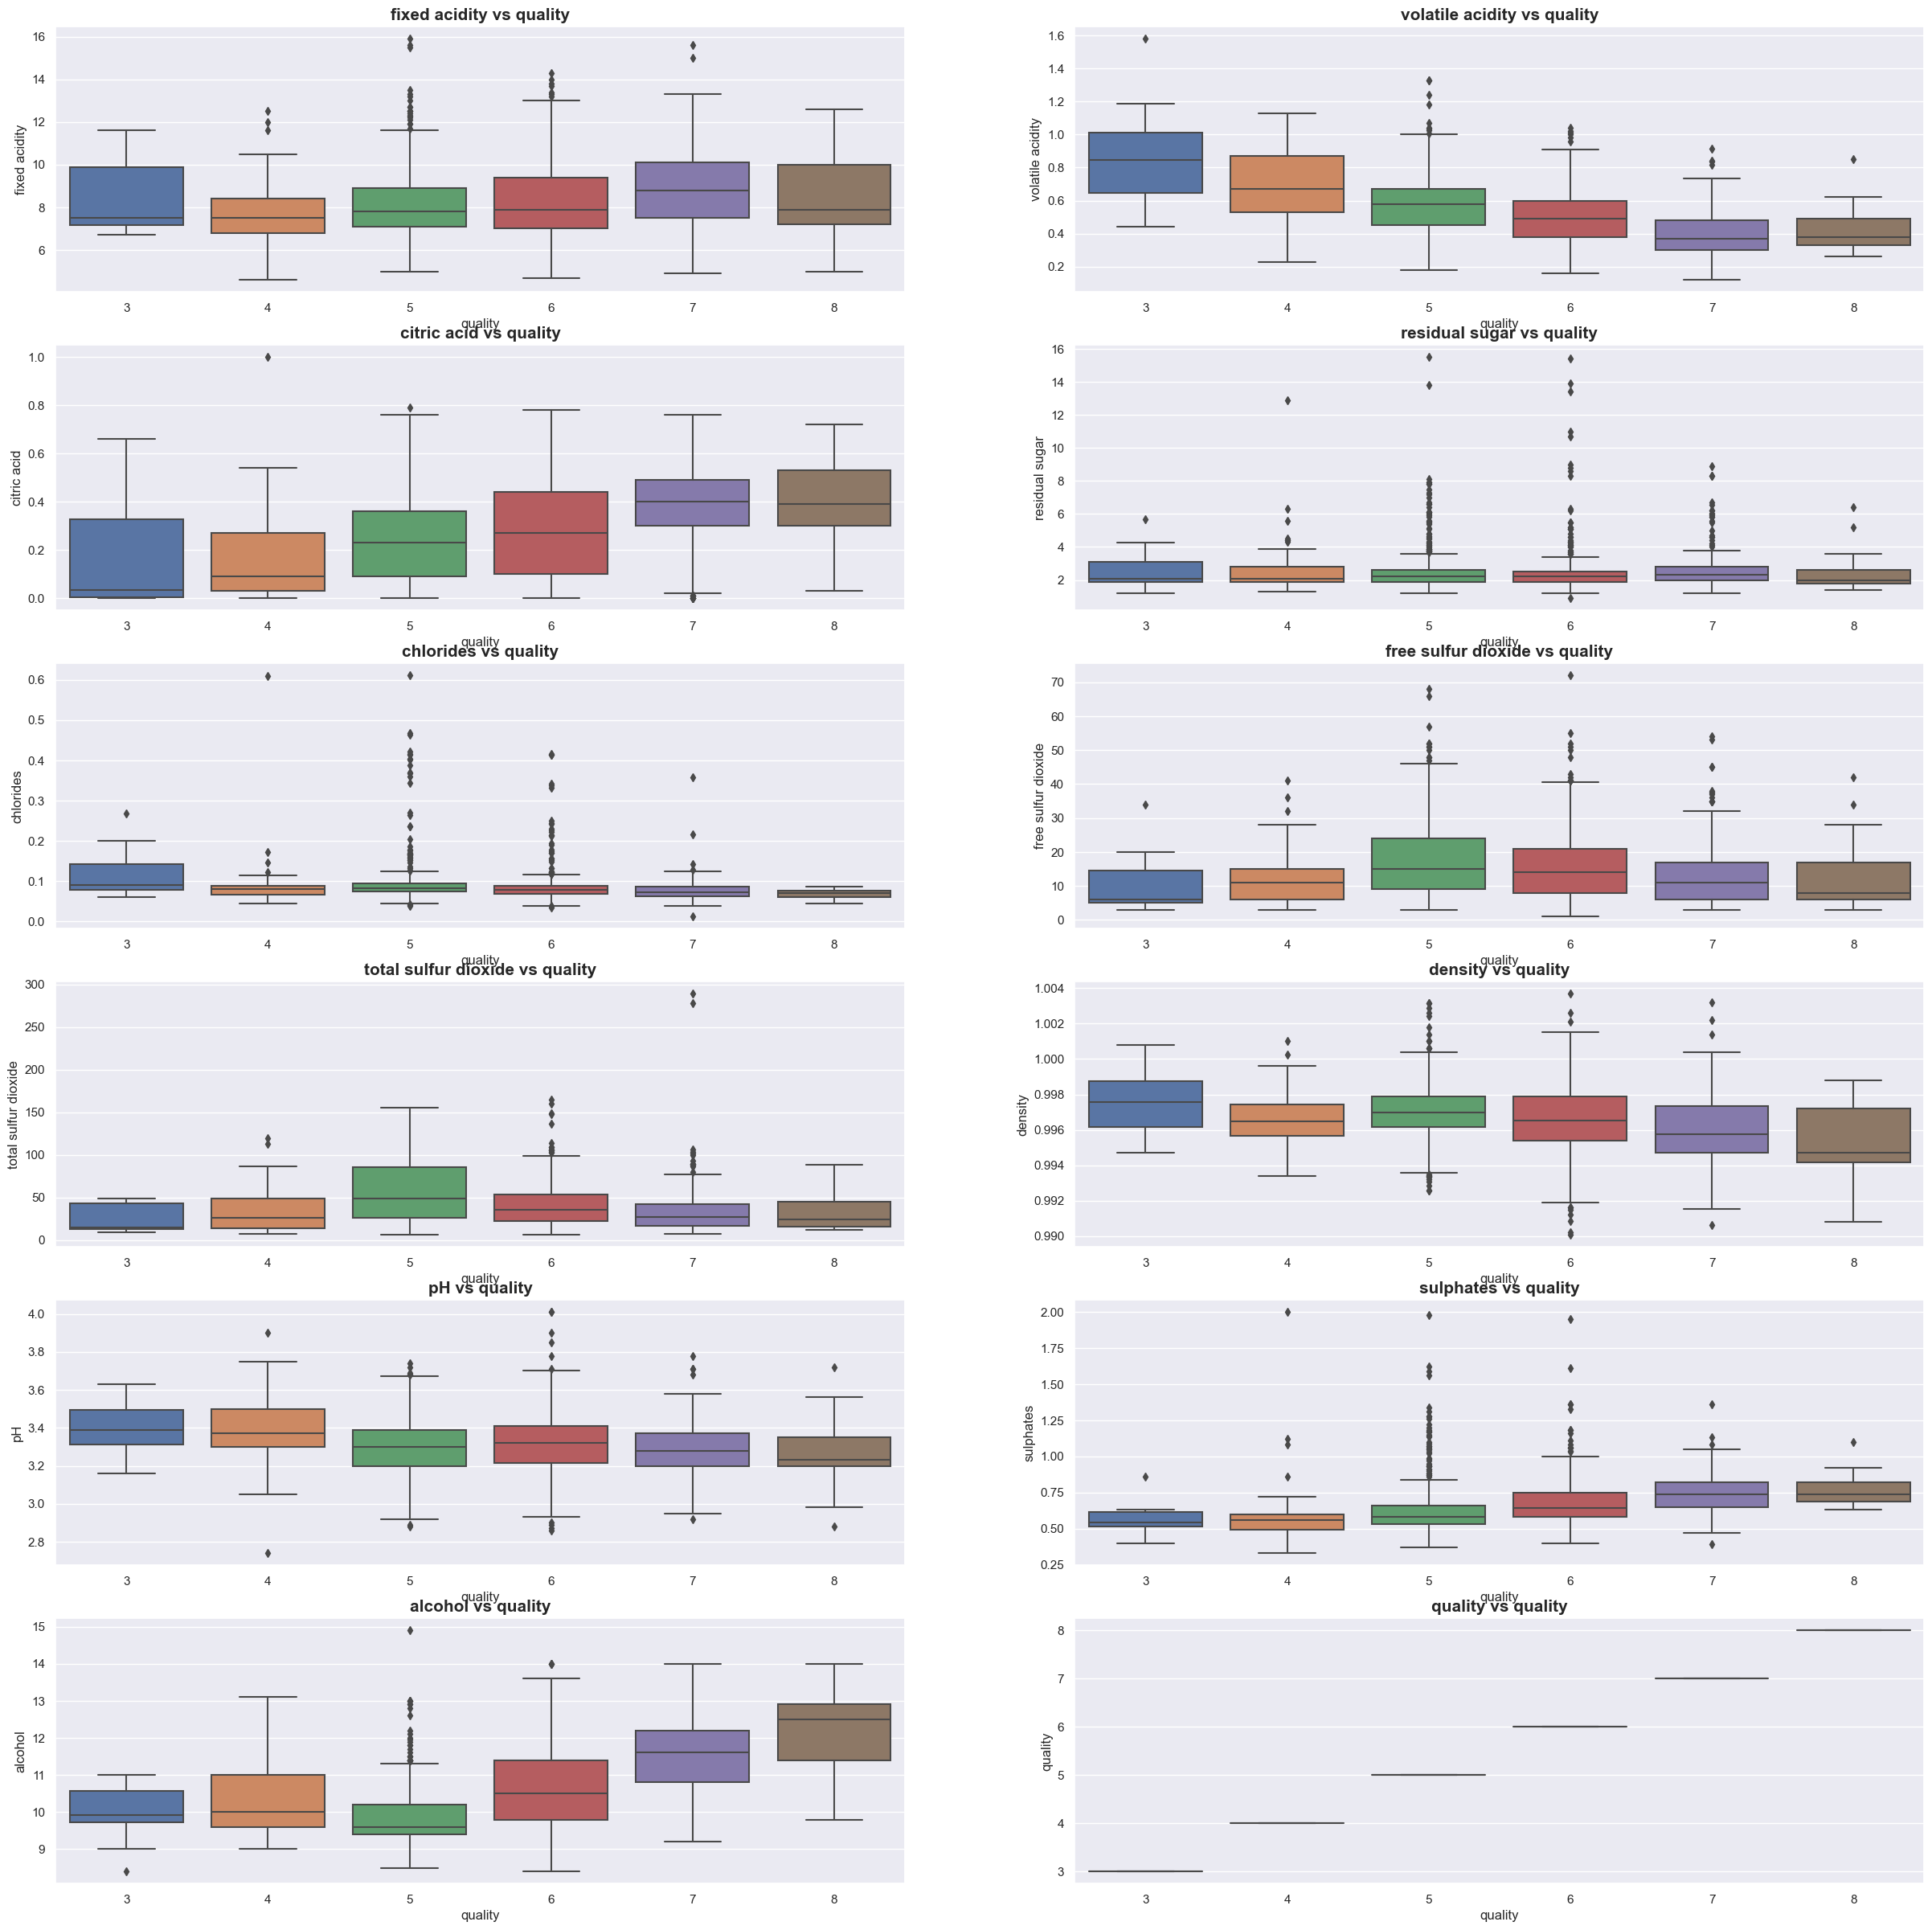

In [21]:
plt.figure(figsize=(30,30))
for i in enumerate(df):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=df, y=i[1], x='quality')
    plt.title("{} vs quality".format(i[1]),fontsize=15, fontweight="bold")

### <span style="color:green">Scatter of each independent features wrt to dependent feature

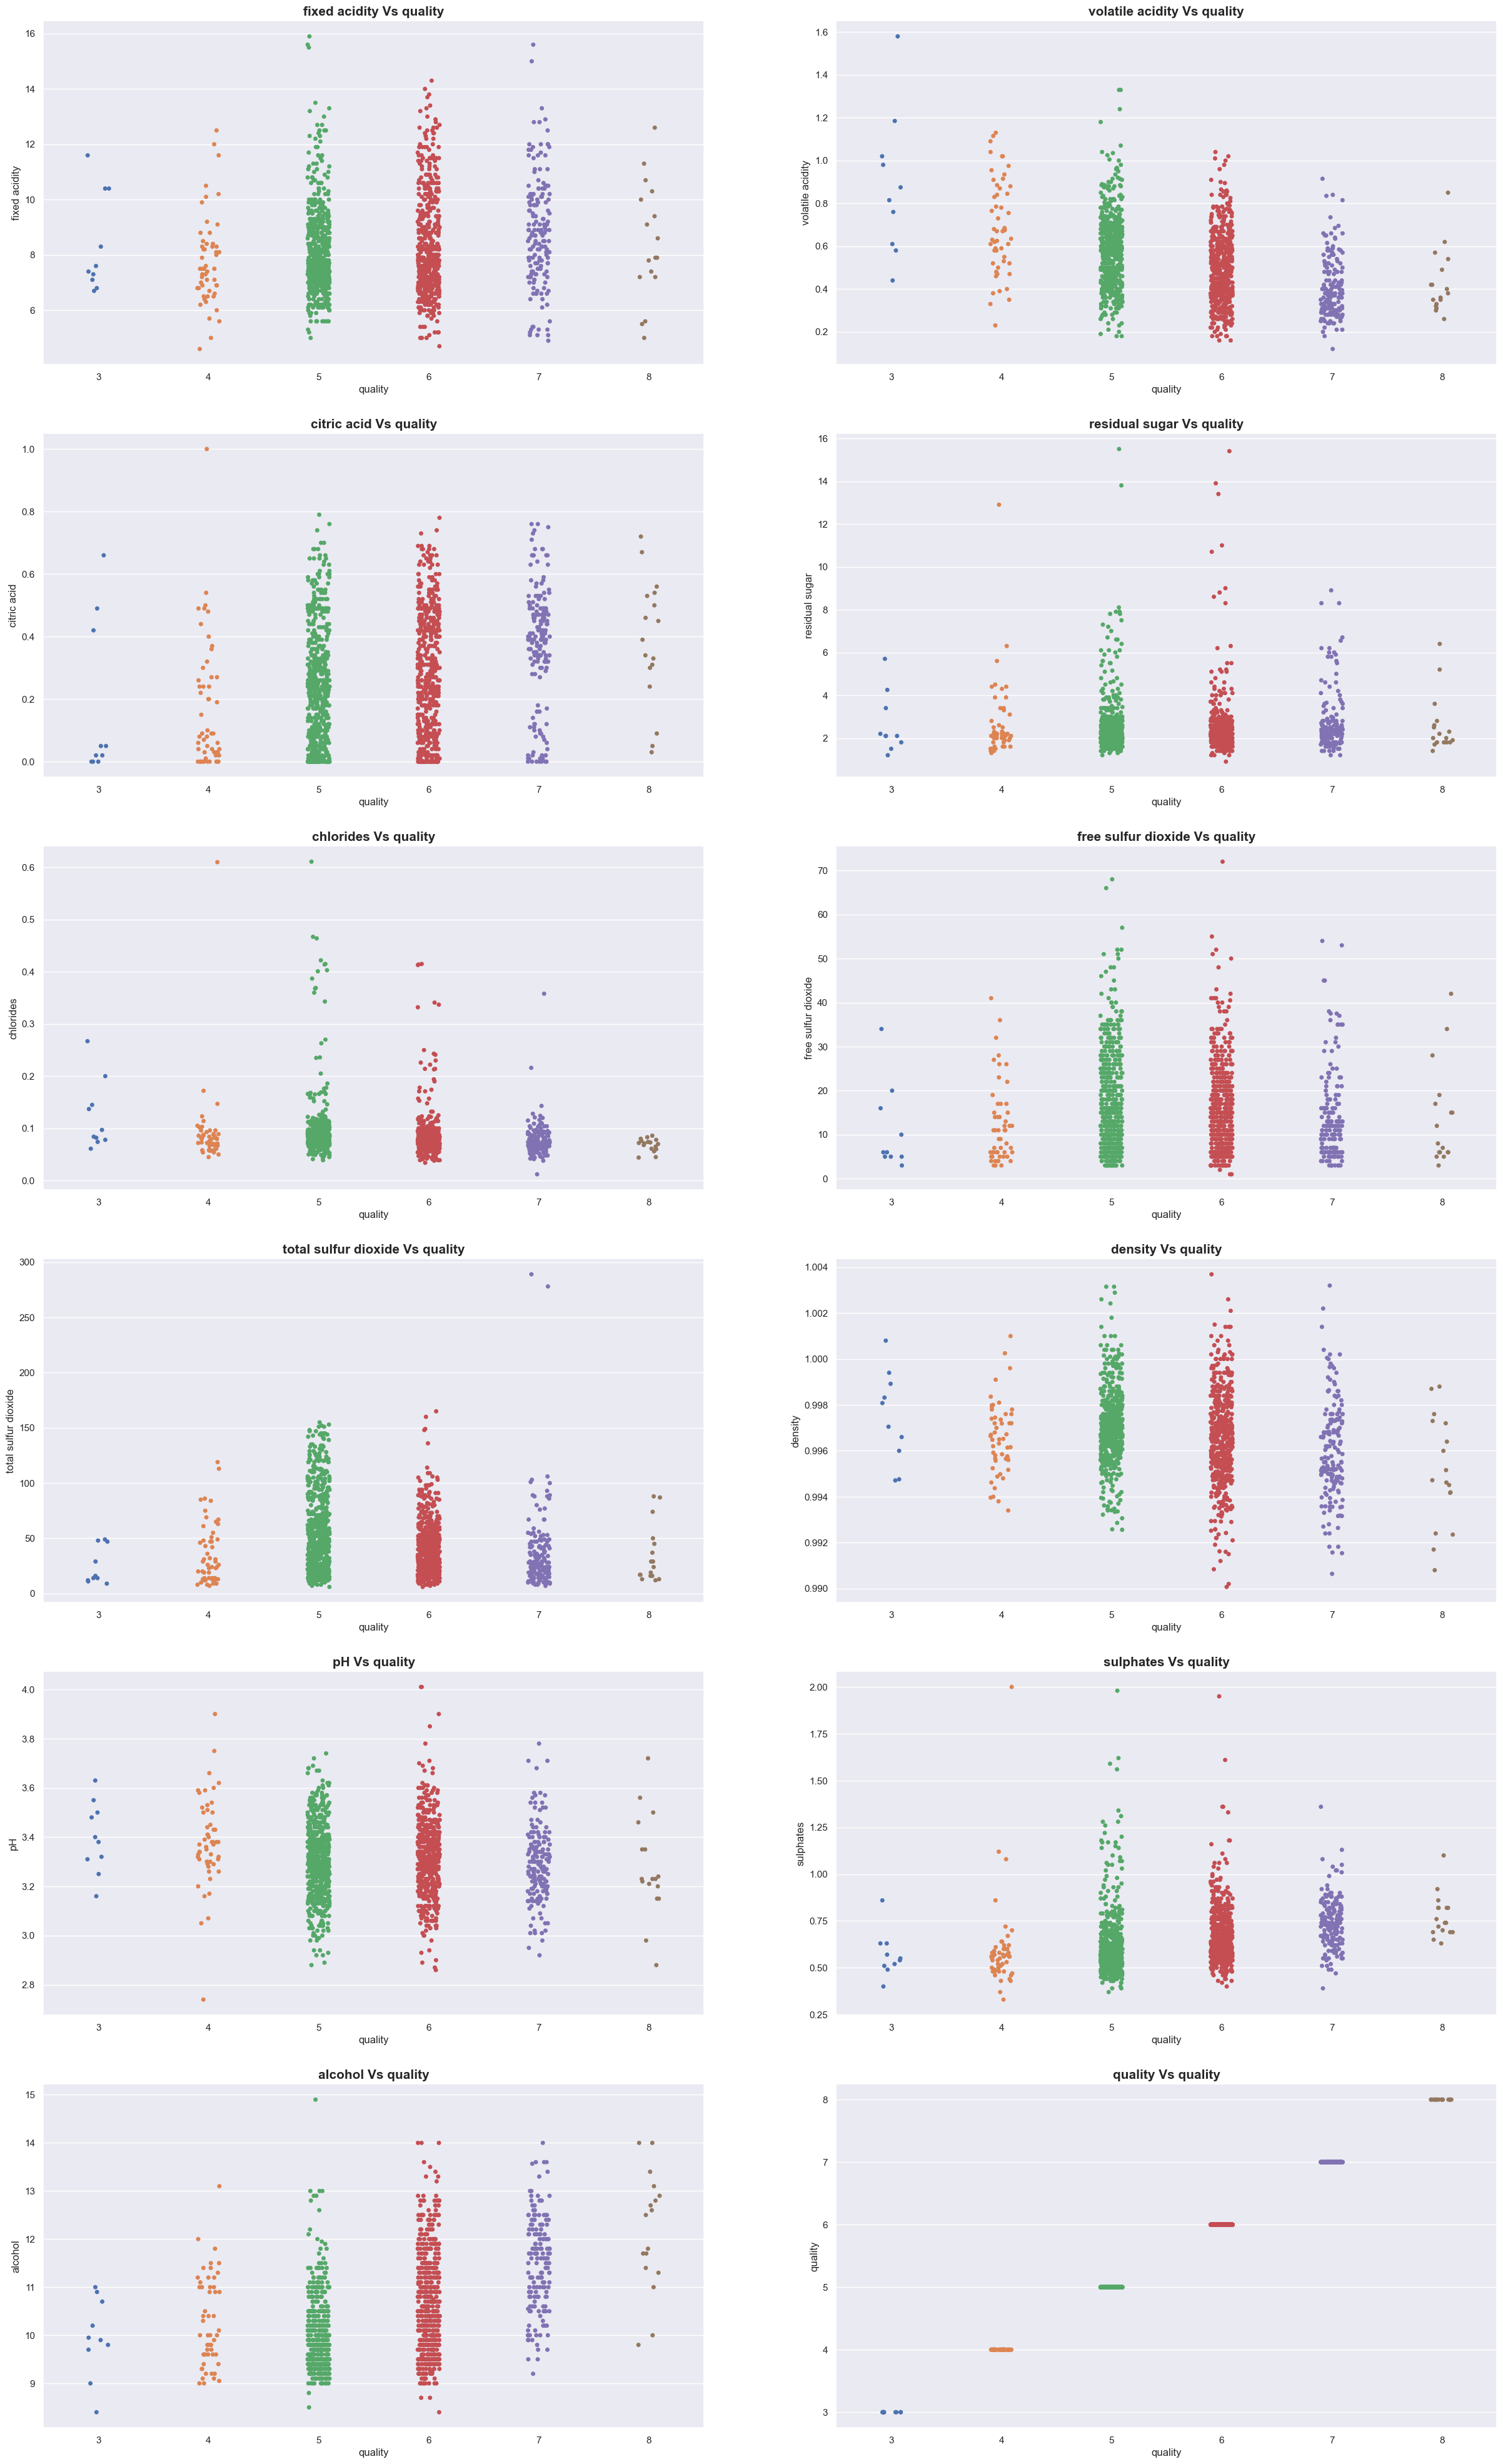

In [20]:
plt.figure(figsize=(30,50))
for i in enumerate(df):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=df, y=i[1], x='quality')
    plt.title("{} Vs quality".format(i[1]),fontsize=15, fontweight="bold")

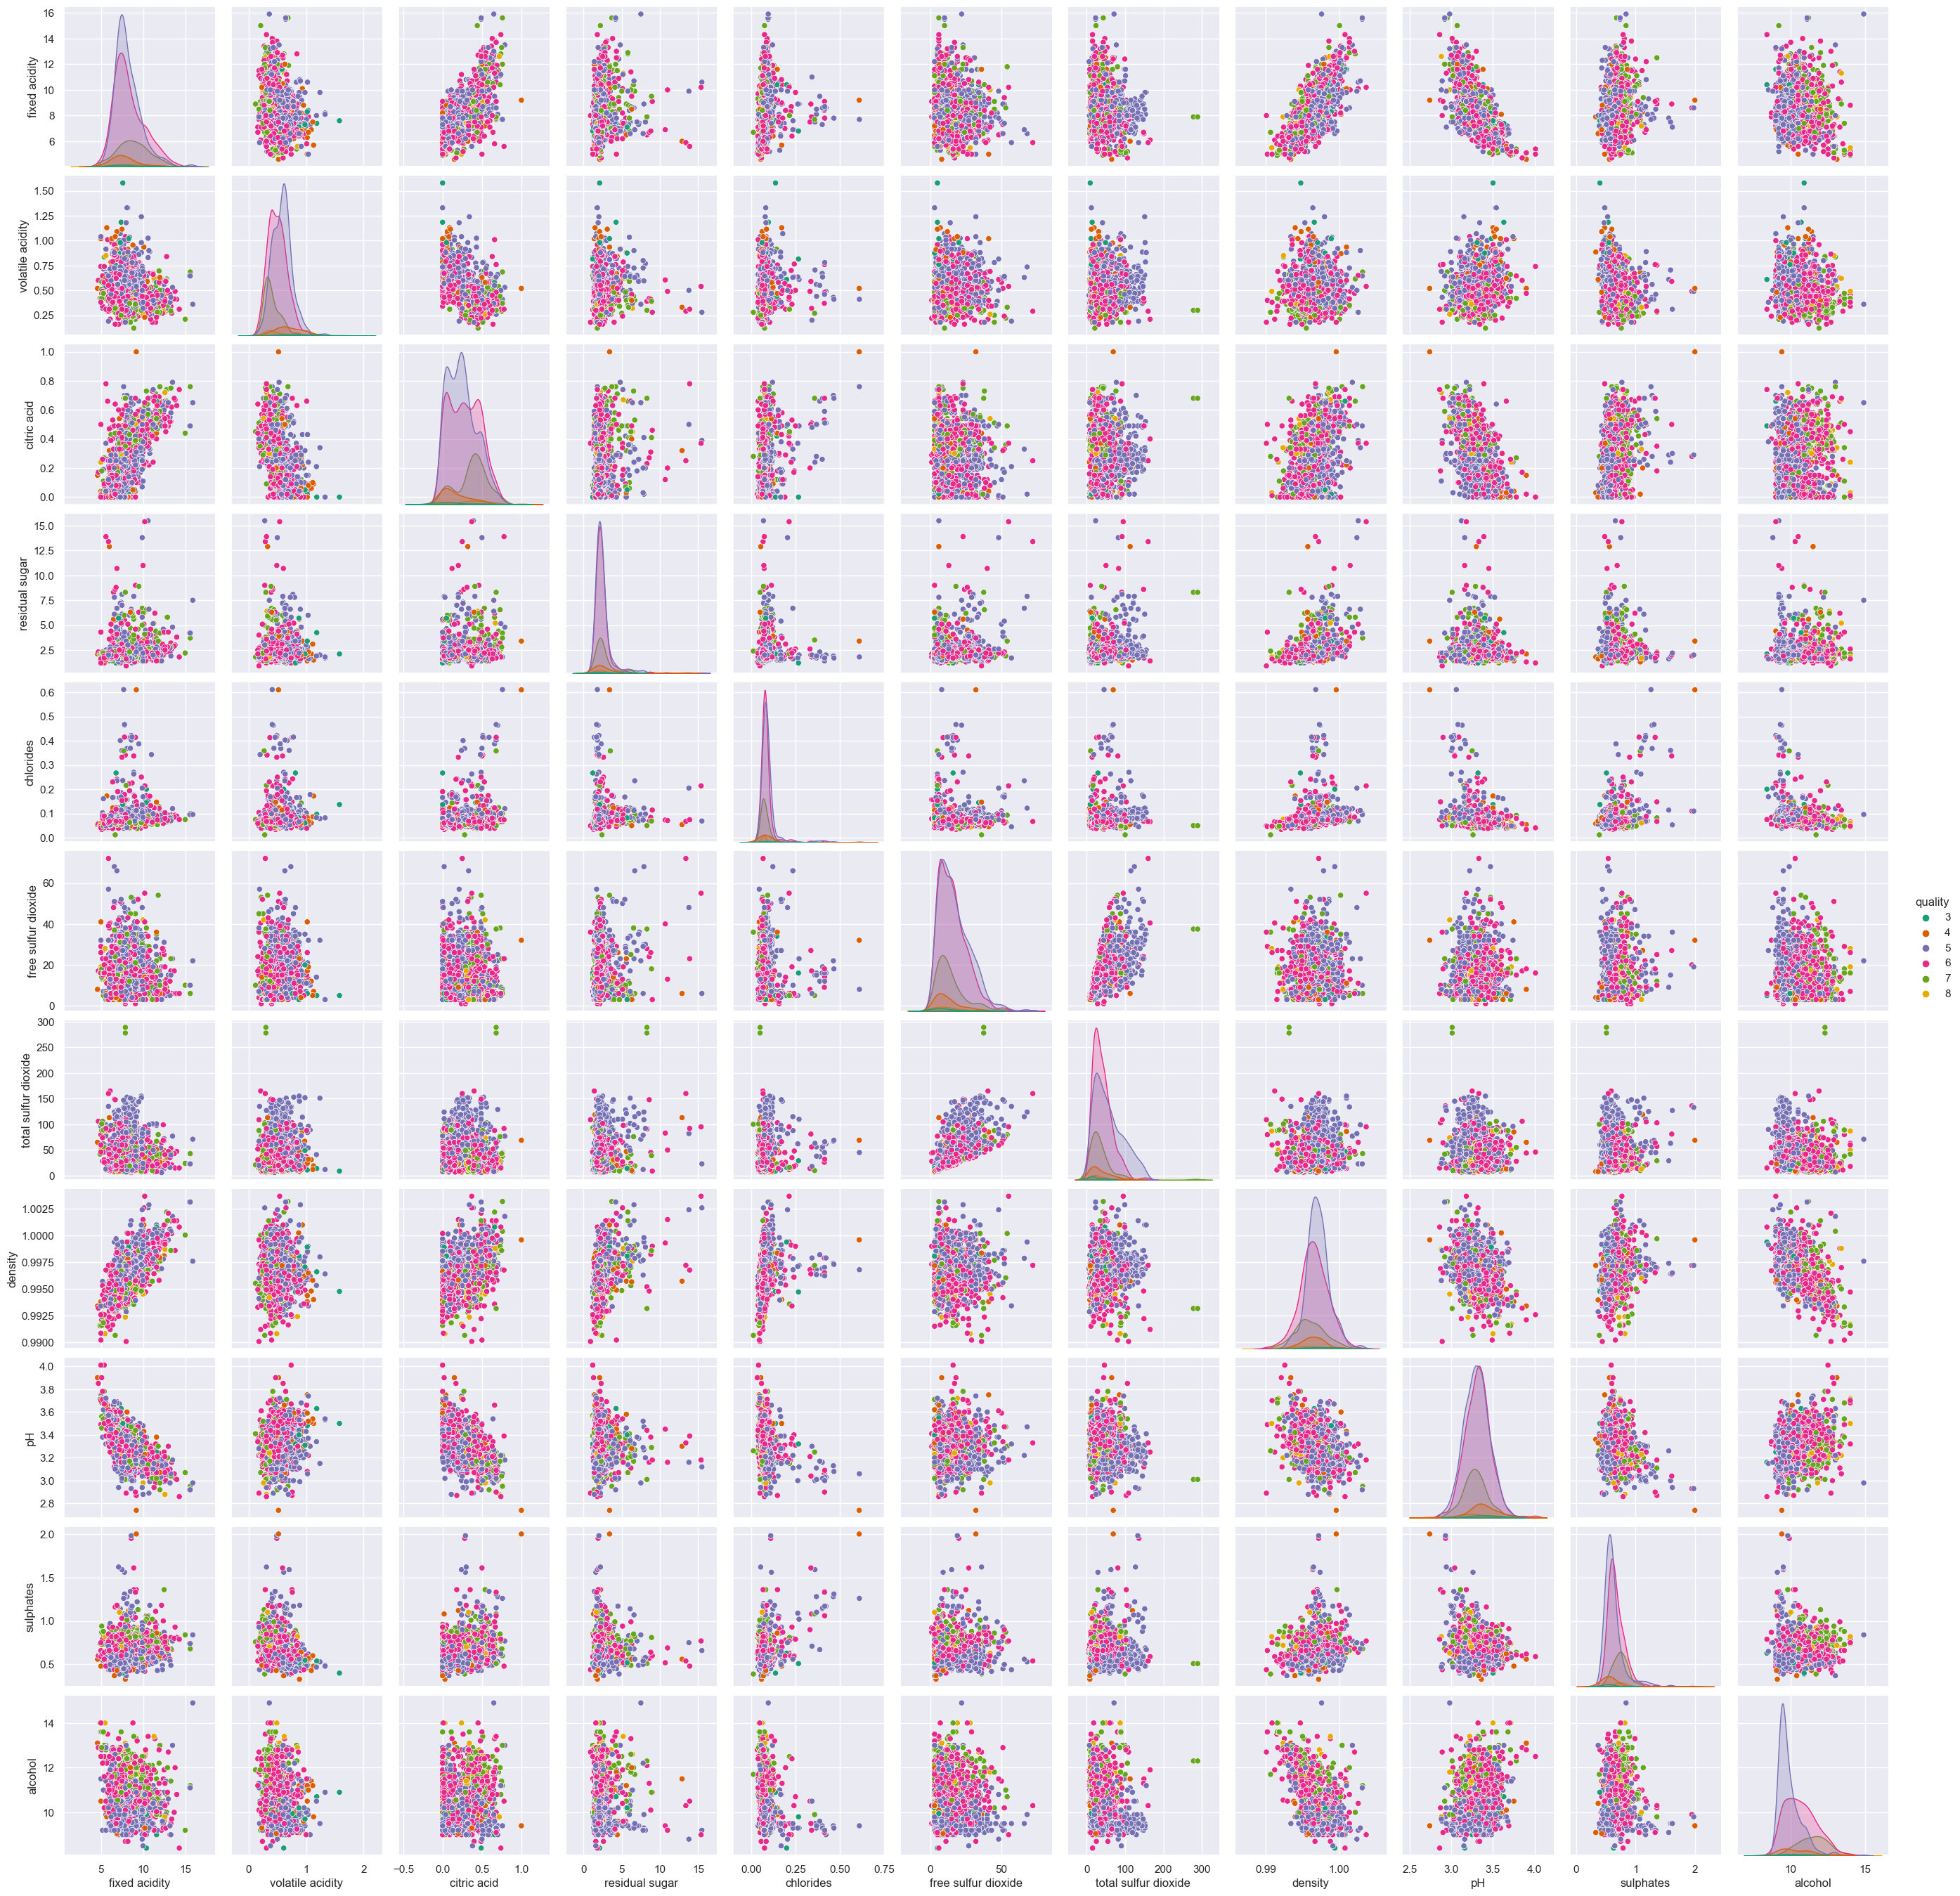

In [15]:
sns.pairplot(data=df,hue='quality',palette='Dark2')

### <span style="color:green">Visualizing correlation

<AxesSubplot:>

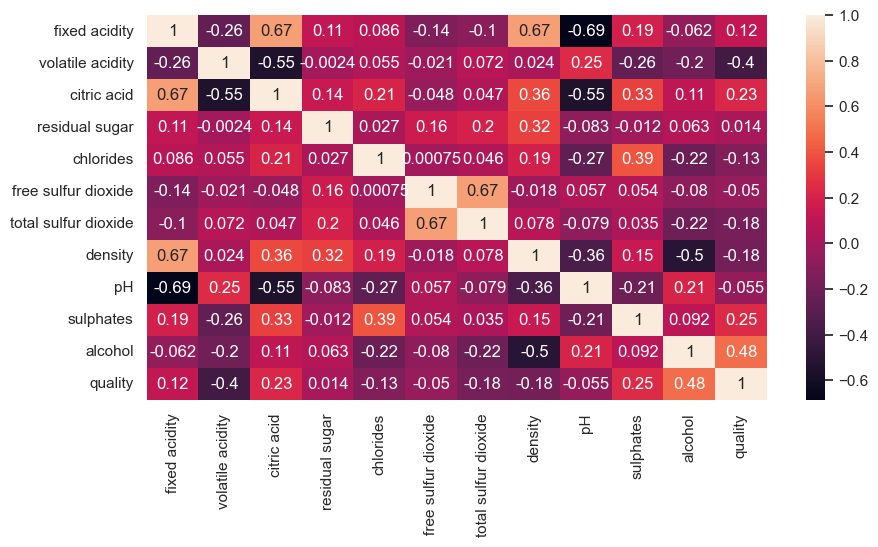

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df.corr(),annot=True)

### <span style="color:green">Countplot for target feature

<AxesSubplot:xlabel='quality', ylabel='count'>

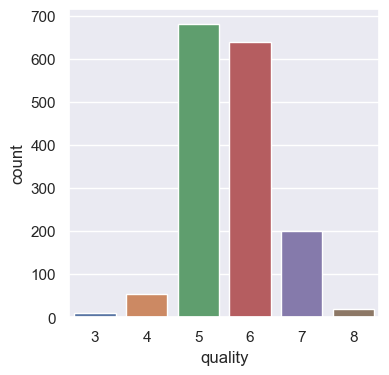

In [17]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data['quality'])

In [18]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### <span style="color:green">Extract input and output variable

In [20]:
X=data.drop("quality",axis=1)

In [21]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [22]:
y=data["quality"]

In [23]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)


In [25]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
236             7.2              0.63         0.00             1.9      0.097   
833            11.6              0.47         0.44             1.6      0.147   
424             7.7              0.96         0.20             2.0      0.047   
982             7.3              0.52         0.32             2.1      0.070   
1155            8.3              0.60         0.25             2.2      0.118   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
236                  14.0                  38.0  0.99675  3.37       0.58   
833                  36.0                  51.0  0.99836  3.38       0.86   
424                  15.0                  60.0  0.99550  3.36       0.44   
982                  51.0                  70.0  0.99418  3.34       0.82   
1155                  9.0                  38.0  0.99616  3.15       0.53   

      alcohol  
236       9.0  
833       9.9  
424      10.9  
982      12.9  
1155      9.8

### <span style="color:green">Scaling the data for better understanding fro model

In [26]:
scaler = StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
X_train

array([[ 0.23329473, -0.30790489,  1.10654391, ..., -0.11052775,
        -0.35470131, -0.59419902],
       [-1.99096632, -0.59045663, -1.39153394, ...,  2.63326864,
         0.43885158,  3.42136454],
       [-0.45109328, -0.0818635 , -0.62681623, ..., -0.89446957,
        -0.18465427, -0.2117644 ],
       ...,
       [ 0.29032707,  1.782978  ,  0.3418262 , ..., -1.221112  ,
        -1.03488951, -1.26345961],
       [ 2.51458812, -1.26858081,  2.38107342, ..., -0.69848411,
         0.60889863,  0.36188754],
       [-0.85031963, -0.0818635 , -0.21896679, ...,  0.60808559,
         1.00567508,  0.74432217]])

In [29]:
X_test

array([[-0.67922262,  0.59626068, -1.39153394, ...,  0.41210014,
        -0.46806601, -1.35906827],
       [ 1.8302001 , -0.30790489,  0.851638  , ...,  0.47742862,
         1.11903978, -0.49859036],
       [-0.39406095,  2.46110218, -0.37191033, ...,  0.34677165,
        -1.26161891,  0.4574962 ],
       ...,
       [-1.07844896, -0.75998768, -0.21896679, ...,  0.86939954,
        -0.63811306,  1.60480007],
       [-1.1354813 , -0.81649802, -0.67779741, ...,  0.86939954,
        -0.07128957,  0.64871351],
       [ 1.6591031 , -1.04253942,  0.90261918, ..., -2.39702474,
        -0.01460722, -1.16785096]])

In [30]:
print(scaler.mean_)

[ 8.39094304  0.52448646  0.27295051  2.54659197  0.08745191 15.79971989
 46.12885154  0.9968044   3.30691877  0.66257703 10.42149082]


# <span style="color:blue">Model Building

### <span style="color:green">Fitting Kernel SVM to the Training set

In [31]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### <span style="color:green">Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,

### <span style="color:green">Making the Confusion Matrix

In [33]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   5,   0,   0,   0],
       [  0,   0,   6,   7,   0,   0],
       [  0,   0, 196,  40,   0,   0],
       [  0,   0,  72, 124,   0,   0],
       [  0,   0,   5,  66,   0,   0],
       [  0,   0,   0,   7,   0,   0]], dtype=int64)

### <span style="color:green">Checking the accuracy

In [34]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6060606060606061

# <span style="color:blue">Hyperparameter Tuning by GridSearchCV

In [35]:
parameters= {'C': [0.1,1, 10, 100], 
              'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [36]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


### <span style="color:green">Training accuracy

In [37]:
training_accuracy = grid_search.best_score_
training_accuracy

0.629354488154749

### <span style="color:green">Showing the best parameters

In [38]:
grid_search.best_params_


{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

### <span style="color:green">Executing the best model

In [39]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

SVC(gamma=0.7)

### <span style="color:green">Predicting the Test set results

In [40]:
y_pred = classifier.predict(X_test)

### <span style="color:green">Showing the Confusion Matrix

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   3,   2,   0,   0],
       [  0,   0,   6,   7,   0,   0],
       [  0,   0, 181,  54,   1,   0],
       [  0,   0,  48, 141,   7,   0],
       [  0,   0,   4,  40,  27,   0],
       [  0,   0,   1,   5,   1,   0]], dtype=int64)

### <span style="color:green">Accuracy after implementing best selected model

In [42]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6609848484848485

### <span style="color:green">Showing the Classification Report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.74      0.77      0.76       236
           6       0.57      0.72      0.63       196
           7       0.75      0.38      0.50        71
           8       0.00      0.00      0.00         7

    accuracy                           0.66       528
   macro avg       0.34      0.31      0.32       528
weighted avg       0.64      0.66      0.64       528



# <span style="color:MAGENTA">THANK YOU